In [5]:
import numpy as np
data = np.loadtxt('/Users/mrizzo/IFS/crispy/crispy/Inputs/LAS_spectra_for_exospec_bright_comparison_at_90_deg_phase.txt')
data2 = np.loadtxt('/Users/mrizzo/IFS/crispy/crispy/Inputs/Jupiter_1x_5AU_90deg.dat')

In [6]:
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'
print data.shape

Populating the interactive namespace from numpy and matplotlib
(170, 5)


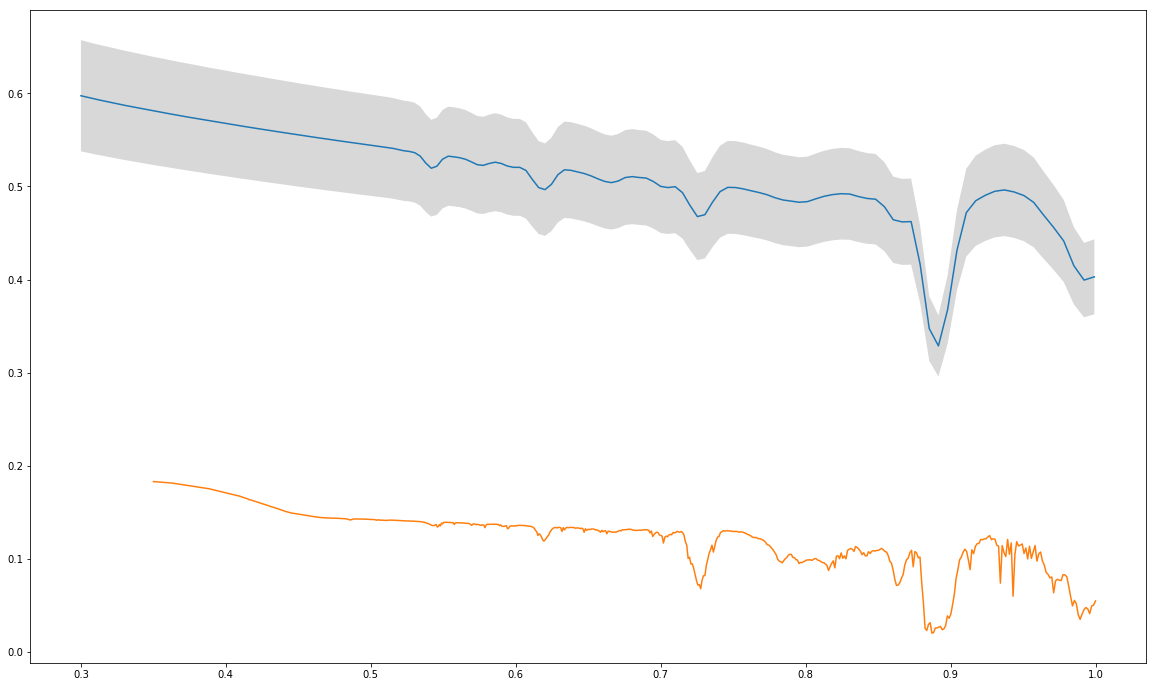

In [101]:
plt.figure(figsize(20,12))
plt.plot(data[:,0],data[:,1])
plt.fill_between(data[:,0],0.9*data[:,1],1.1*data[:,1],alpha=0.3,facecolor='Gray')
plt.plot(data2[:,0],data2[:,-1])

In [104]:
newSpec = np.zeros((data.shape[0],2))
newSpec[:,0] = data[:,0]
newSpec[:,1] = data[:,4]
np.savetxt('/Users/mrizzo/IFS/crispy/crispy/Inputs/LAS_spectra_for_exospec_bright_comparison_at_90_deg_phase.txt',newSpec)

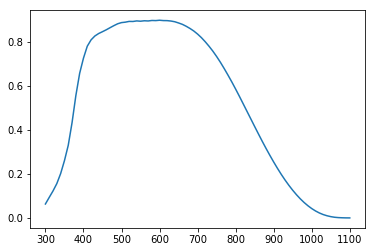

In [4]:
QE = np.loadtxt('/Users/mrizzo/IFS/crispy/crispy/QE_CCD201.txt')
plt.plot(QE[:,0],QE[:,-1])

In [8]:
def lin_dec_func(lam):
    return (0.32-0.39)/(950.-600.)*lam+0.51


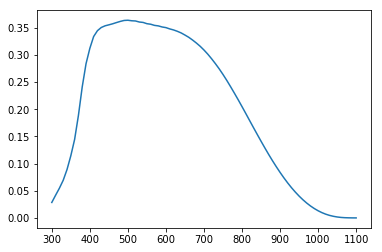

In [9]:
plt.plot(QE[:,0],QE[:,-1]*lin_dec_func(QE[:,0]))

In [10]:
newQE = np.zeros(QE.shape)

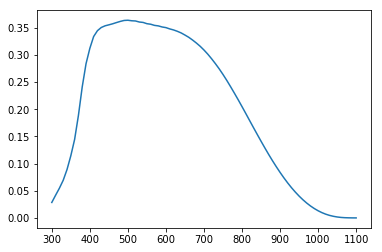

In [14]:
newQE[:,0] = QE[:,0]
newQE[:,1] = QE[:,1]*lin_dec_func(QE[:,0])
plt.plot(newQE[:,0],newQE[:,1])
np.savetxt('/Users/mrizzo/IFS/crispy/crispy/QE_CCD201_withIFSLosses.txt',newQE)

In [13]:
help(np.savetxt)

Help on function savetxt in module numpy.lib.npyio:

savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')
    Save an array to a text file.
    
    Parameters
    ----------
    fname : filename or file handle
        If the filename ends in ``.gz``, the file is automatically saved in
        compressed gzip format.  `loadtxt` understands gzipped files
        transparently.
    X : array_like
        Data to be saved to a text file.
    fmt : str or sequence of strs, optional
        A single format (%10.5f), a sequence of formats, or a
        multi-format string, e.g. 'Iteration %d -- %10.5f', in which
        case `delimiter` is ignored. For complex `X`, the legal options
        for `fmt` are:
            a) a single specifier, `fmt='%.4e'`, resulting in numbers formatted
                like `' (%s+%sj)' % (fmt, fmt)`
            b) a full string specifying every real and imaginary part, e.g.
                `' %.4e %+.4j %.4e %+.4j %.

In [70]:
def print_format_table():
    """
    prints table of formatted text format options
    """
    for style in range(8):
        for fg in range(30,40):
            s1 = ''
            for bg in range(40,48):
                format = ';'.join([str(style), str(fg), str(bg)])
                s1 += '\x1b[%sm %s \x1b[0m' % (format, format)
            print(s1)
        print('\n')

print_format_table()

 0;30;40  0;30;41  0;30;42  0;30;43  0;30;44  0;30;45  0;30;46  0;30;47 
 0;31;40  0;31;41  0;31;42  0;31;43  0;31;44  0;31;45  0;31;46  0;31;47 
 0;32;40  0;32;41  0;32;42  0;32;43  0;32;44  0;32;45  0;32;46  0;32;47 
 0;33;40  0;33;41  0;33;42  0;33;43  0;33;44  0;33;45  0;33;46  0;33;47 
 0;34;40  0;34;41  0;34;42  0;34;43  0;34;44  0;34;45  0;34;46  0;34;47 
 0;35;40  0;35;41  0;35;42  0;35;43  0;35;44  0;35;45  0;35;46  0;35;47 
 0;36;40  0;36;41  0;36;42  0;36;43  0;36;44  0;36;45  0;36;46  0;36;47 
 0;37;40  0;37;41  0;37;42  0;37;43  0;37;44  0;37;45  0;37;46  0;37;47 
 0;38;40  0;38;41  0;38;42  0;38;43  0;38;44  0;38;45  0;38;46  0;38;47 
 0;39;40  0;39;41  0;39;42  0;39;43  0;39;44  0;39;45  0;39;46  0;39;47 


 1;30;40  1;30;41  1;30;42  1;30;43  1;30;44  1;30;45  1;30;46  1;30;47 
 1;31;40  1;31;41  1;31;42  1;31;43  1;31;44  1;31;45  1;31;46  1;31;47 
 1;32;40  1;32;41  1;32;42  1;32;43  1;32;44  1;32;45  1;32;46  1;32;47 
 1;33;40  1;33;41  1;33;42  1;33;43  1;33;44  1;3

In [96]:
import pandas as pd
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df.style.bar(subset=['A', 'B'], color='#d65f5f')
print df.loc['2013-01-03']['A']
def print_format_table():
    """
    prints table of formatted text format options
    """
    for style in range(8):
        for fg in range(30,38):
            s1 = ''
            for bg in range(40,48):
                format = ';'.join([str(style), str(fg), str(bg)])
                s1 += '\x1b[%sm %f \x1b[0m' % (format, df.loc['2013-01-03']['A'])
            print(s1)
        print('\n')

#print_format_table()
# bg: 41 ==red ; 42==green ; 43 == yellow ; 44 = blue
# fg: 33 = yellow
format = ';'.join([str(1), str(33), str(42)])
df.loc['2013-01-03']['A'] = '\x1b[%sm %f \x1b[0m' % (format, df.loc['2013-01-03']['A'])
print df['A'][1]
print df

style=1
fg=33
bg=42
format_blue = ';'.join([str(1), str(37), str(44)])
format_green = ';'.join([str(1), str(30), str(42)])
format_yellow = ';'.join([str(1), str(30), str(43)])
format_red = ';'.join([str(5), str(37), str(41)])
for j in range(df.shape[0]):
    s = ''
    for col in df.columns:
        if df[col][j]>1: format = format_red
        elif df[col][j]<1 and df[col][j]>0: format = format_yellow
        elif df[col][j]<0.0 and df[col][j]>-0.5: format = format_green
        elif df[col][j]<0.5: format = format_blue
        s += '\x1b[%sm %s \x1b[0m' % (format, '{:>10}'.format('%.3f' % df[col][j]))
    print s         
    

0.249638732934
-3.05724801522
                   A         B         C         D
2013-01-01  0.625253 -1.538026  1.996917  0.096069
2013-01-02 -3.057248  0.324147  0.198364 -1.138262
2013-01-03  0.249639  0.712717  0.683659  0.140070
2013-01-04 -1.381369  0.817323  0.695300  1.409022
2013-01-05  0.711854 -1.651910  0.778961  0.722119
2013-01-06  0.658587 -0.632932  0.507745  0.658109
      0.625      -1.538       1.997       0.096 
     -3.057       0.324       0.198      -1.138 
      0.250       0.713       0.684       0.140 
     -1.381       0.817       0.695       1.409 
      0.712      -1.652       0.779       0.722 
      0.659      -0.633       0.508       0.658 


In [98]:
line = ['Name','OBJECT','EXPTIME','RA','DEC']
print('{:>10}{:>10}{:>10}{:>10}'.format(*df.columns))



         A         B         C         D


In [108]:
lam = 720
lamc=660
print 2*50*np.log(600./660.)

-9.53101798043
